# Packages

In [31]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")
sns.set_theme(color_codes=True)

## Read & Clean Data

In [2]:
df = pd.read_csv('Loan_Data.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df['Credit_History'].fillna(0,inplace=True)
df['Self_Employed'].fillna('Yes',inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Dependents'].fillna(0,inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Gender'].fillna('Other',inplace=True)
df['Married'].fillna('No',inplace=True)

In [7]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

  Loan_Status  proportion
0           Y    0.687296
1           N    0.312704
  Loan_Status  count
0           Y    422
1           N    192


<Axes: xlabel='Loan_Status'>

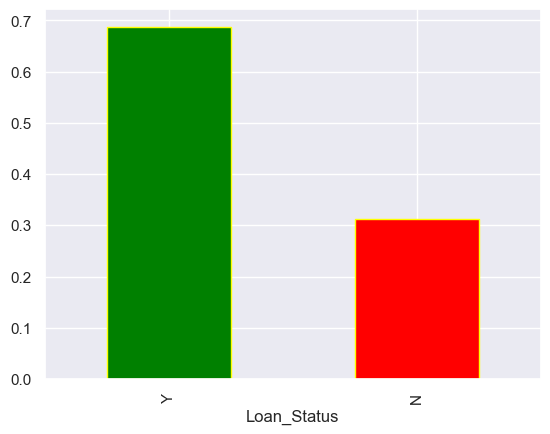

In [8]:
print(df["Loan_Status"].value_counts(normalize = True).reset_index())
print(df["Loan_Status"].value_counts().reset_index())
df['Loan_Status'].value_counts(normalize = True).plot.bar(color=['green', 'red'],edgecolor='yellow')

<Axes: title={'center': 'Credit History'}, xlabel='Credit_History'>

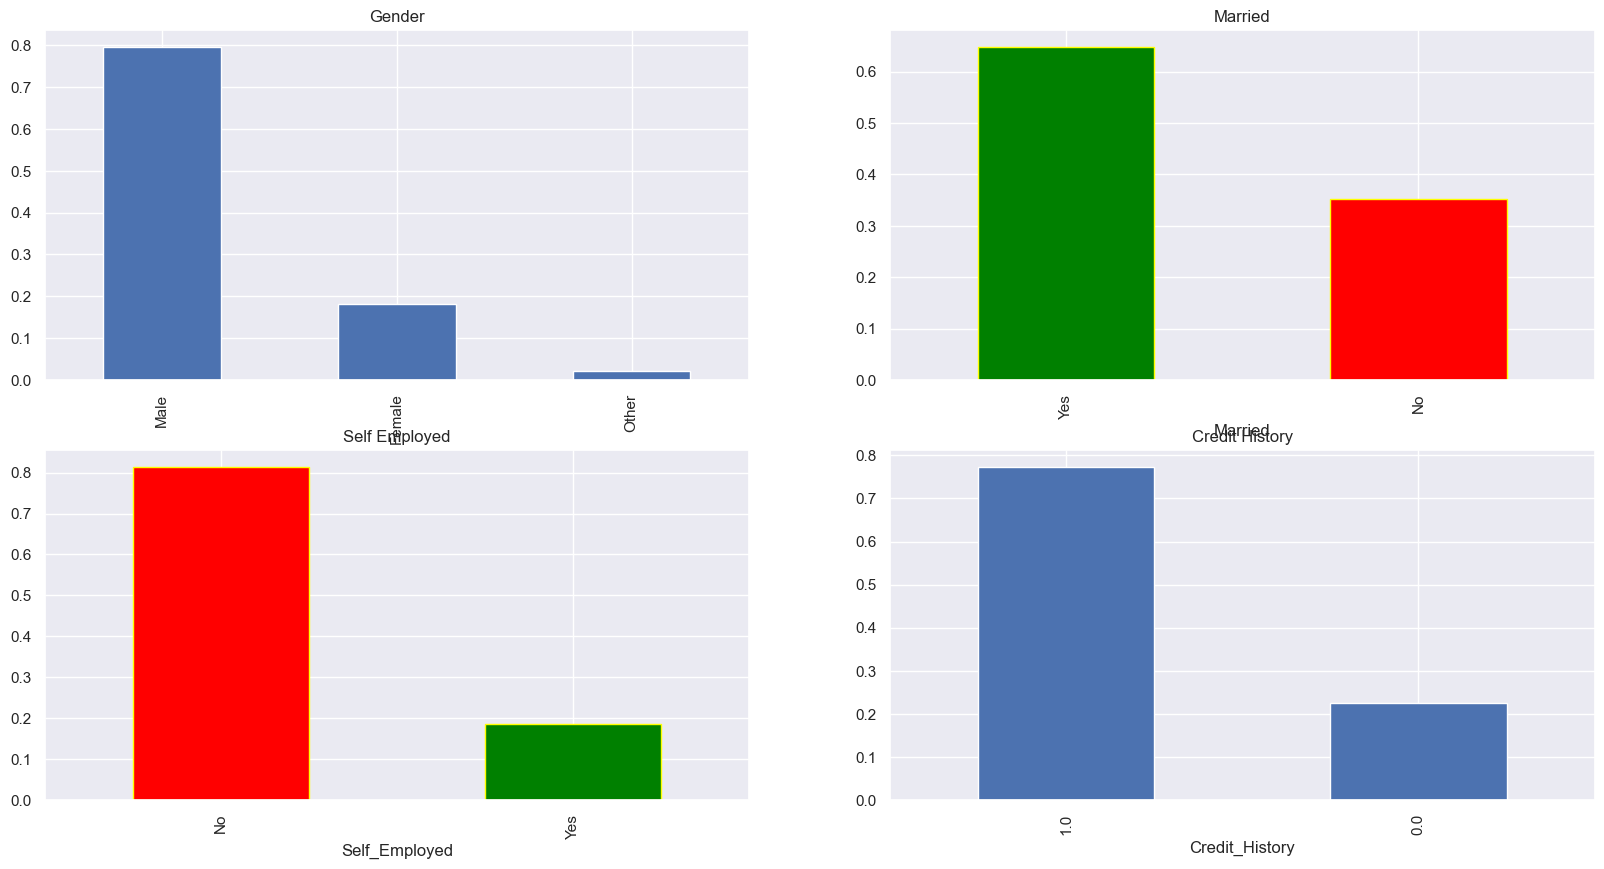

In [9]:
plt.figure(1)
plt.subplot(221) 
df['Gender'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Gender')
plt.subplot(222)
df['Married'].value_counts(normalize = True).plot.bar(title = 'Married', color=['green', 'red'],edgecolor='yellow')
plt.subplot(223)
df['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self Employed', color=['red','green'],edgecolor='yellow')
plt.subplot(224)
df['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit History')

**It can be inferred from the plots that:**

- 85% applicants in the database are males.
- 65% applicants are married
- Around 15% of the applicants are self employed
- Around 85% of the applicants have repaid their debts

<Axes: title={'center': 'Property area'}, xlabel='Property_Area'>

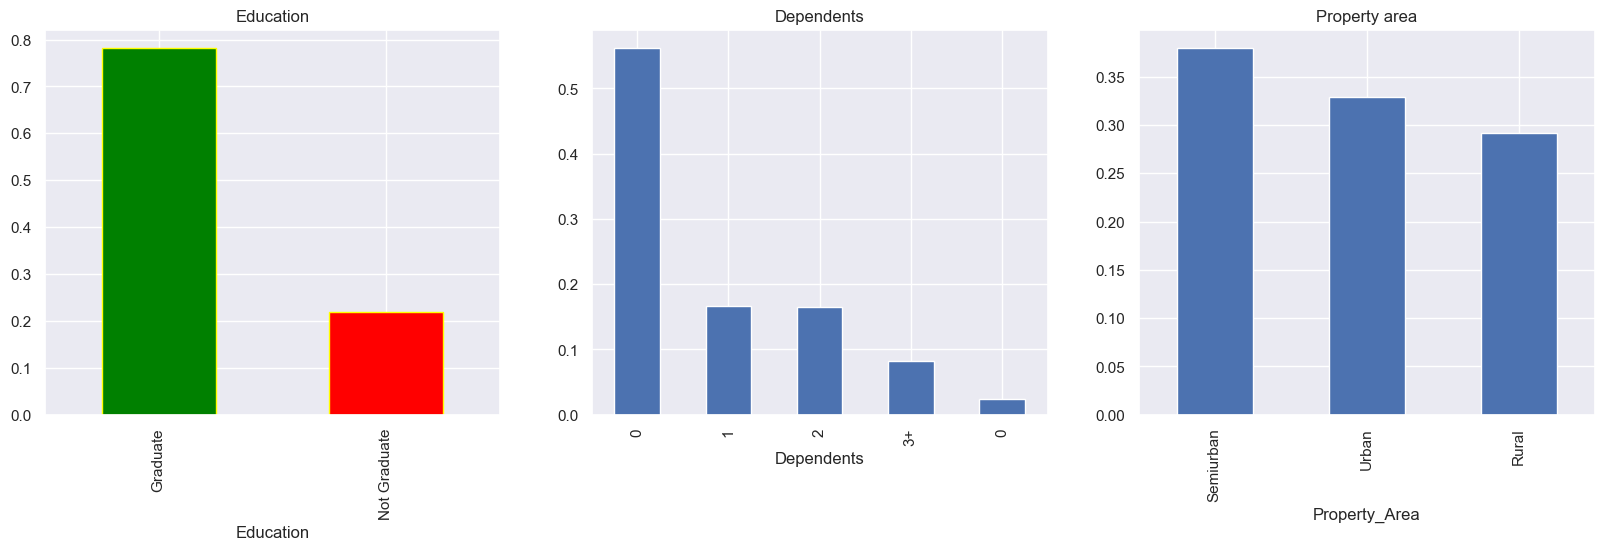

In [10]:
plt.figure(1)
plt.subplot(131)
df['Education'].value_counts(normalize = True).plot.bar(figsize = (20,5), title = 'Education', color=['green', 'red'],edgecolor='yellow')
plt.subplot(132)
df['Dependents'].value_counts(normalize = True).plot.bar(title = 'Dependents')
plt.subplot(133)
df['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property area')

**Following can be inferred from the plots**

- Around 80% are graduates
- Most people don't have dependents
- Most applicants are from semi-urban area

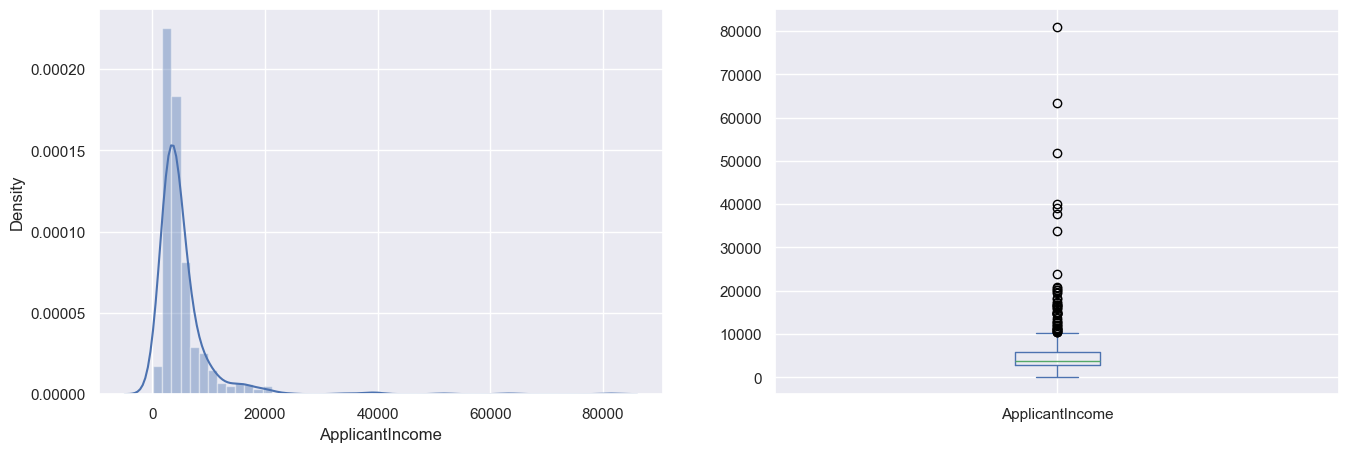

In [11]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['ApplicantIncome'])
plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize = (16,5))
plt.show()

It can be inferred that most of the data in the distribution is inclined towards the left that means data is not normally distributed. We will try to make it normal at later stage.

The boxplot confirms presence of a number of outliers/ extreme values in the database. This can be attributed to the presence of income disparity in the society. This can also be seen from the point of view that we are looking at people with different level of education level

Let's try segregating income by level of education

Text(0.5, 0.98, '')

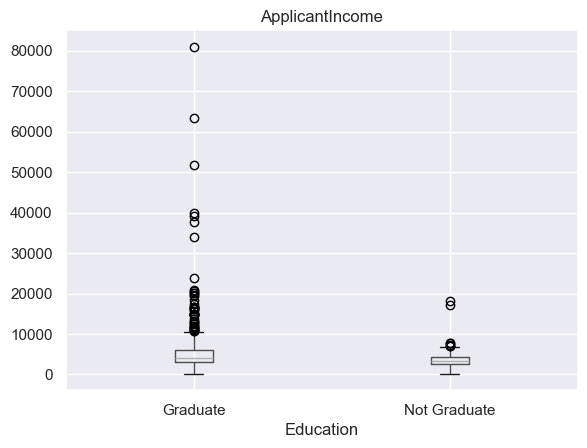

In [12]:
df.boxplot(column = 'ApplicantIncome', by = 'Education') 
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Let’s look at the Coapplicant income distribution

<Axes: >

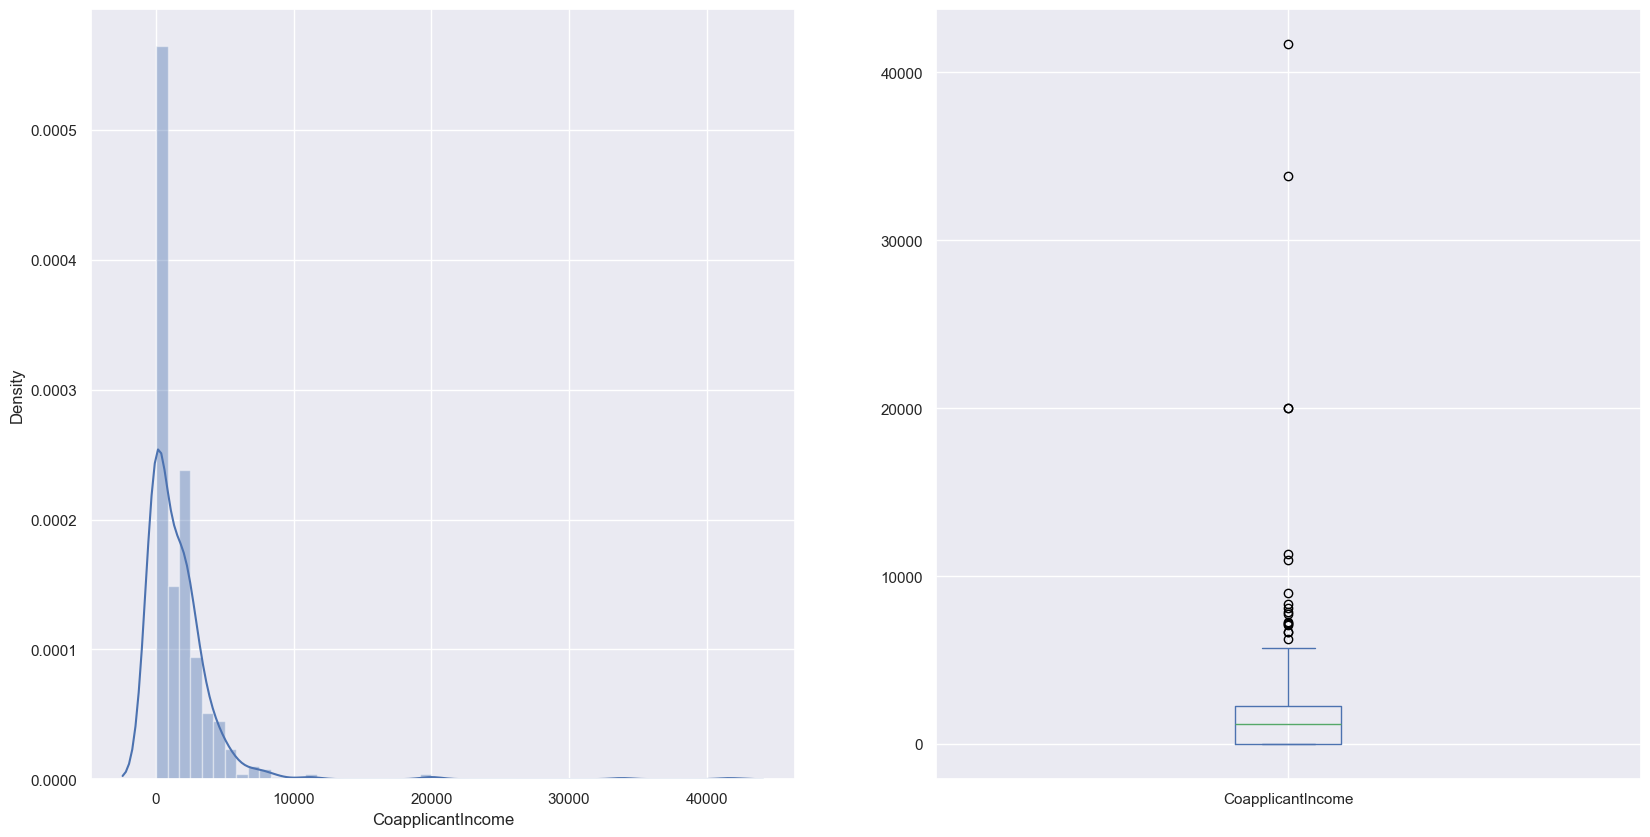

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['CoapplicantIncome'])
plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize =(20,10))

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Let’s look at the distribution of LoanAmount variable.

<Axes: >

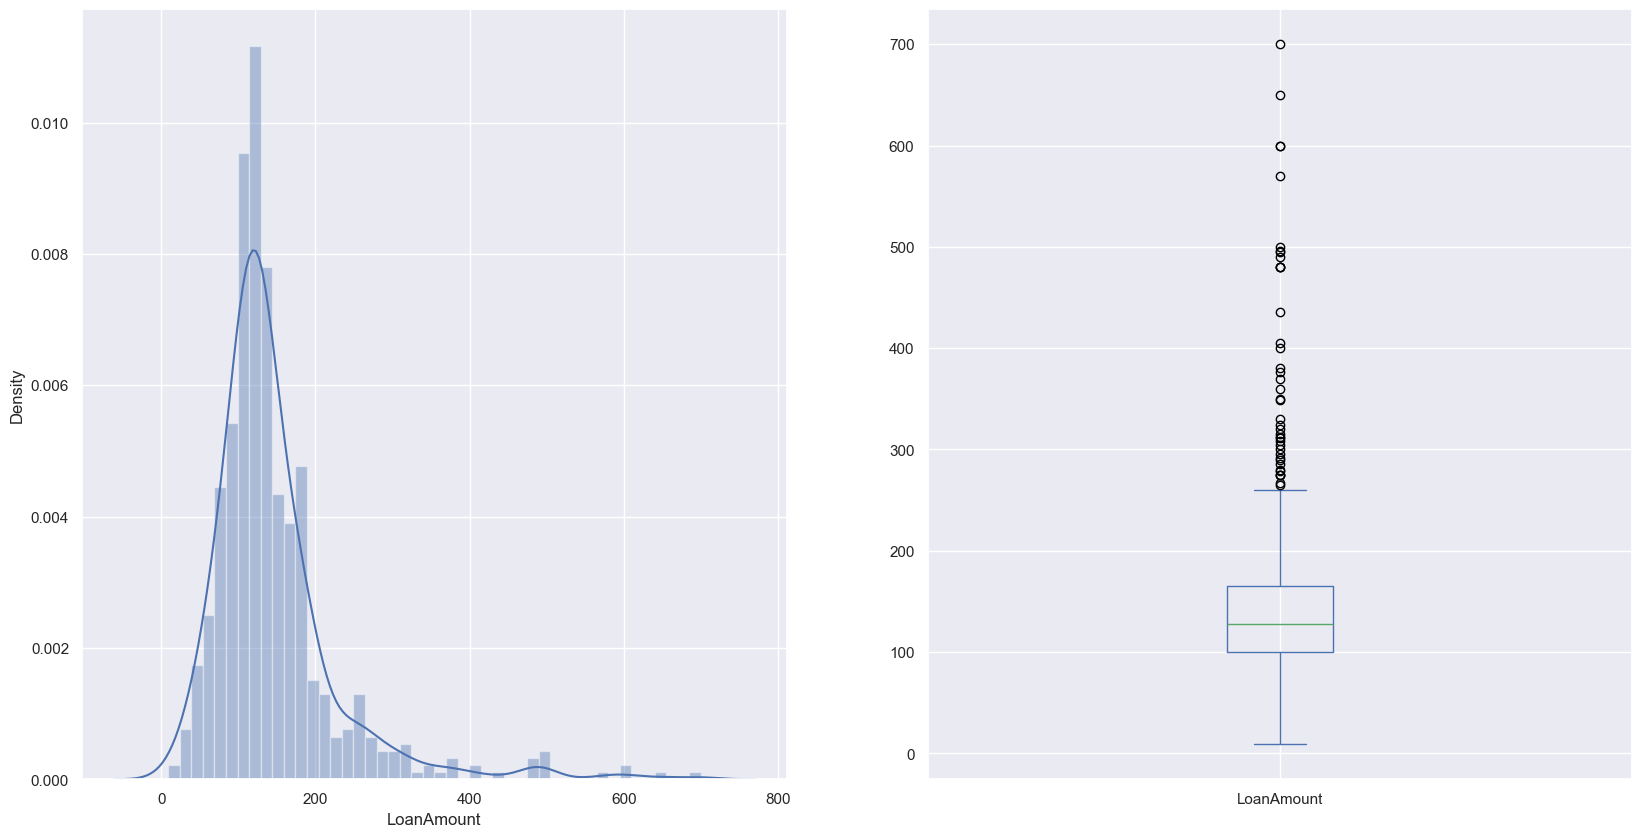

In [14]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['LoanAmount'])
plt.subplot(122)
df['LoanAmount'].plot.box(figsize =(20,10))

<Axes: xlabel='Gender'>

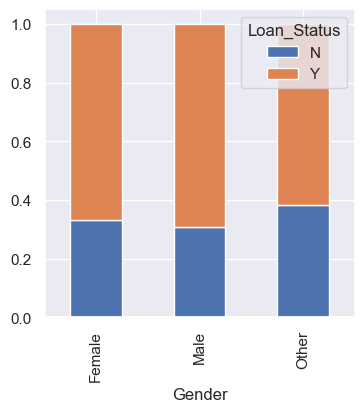

In [15]:
Gender = pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = "bar",stacked = True, figsize =(4,4))

It can be inferred that the approval of loan is not determined by gender.

Now let us see for other variables

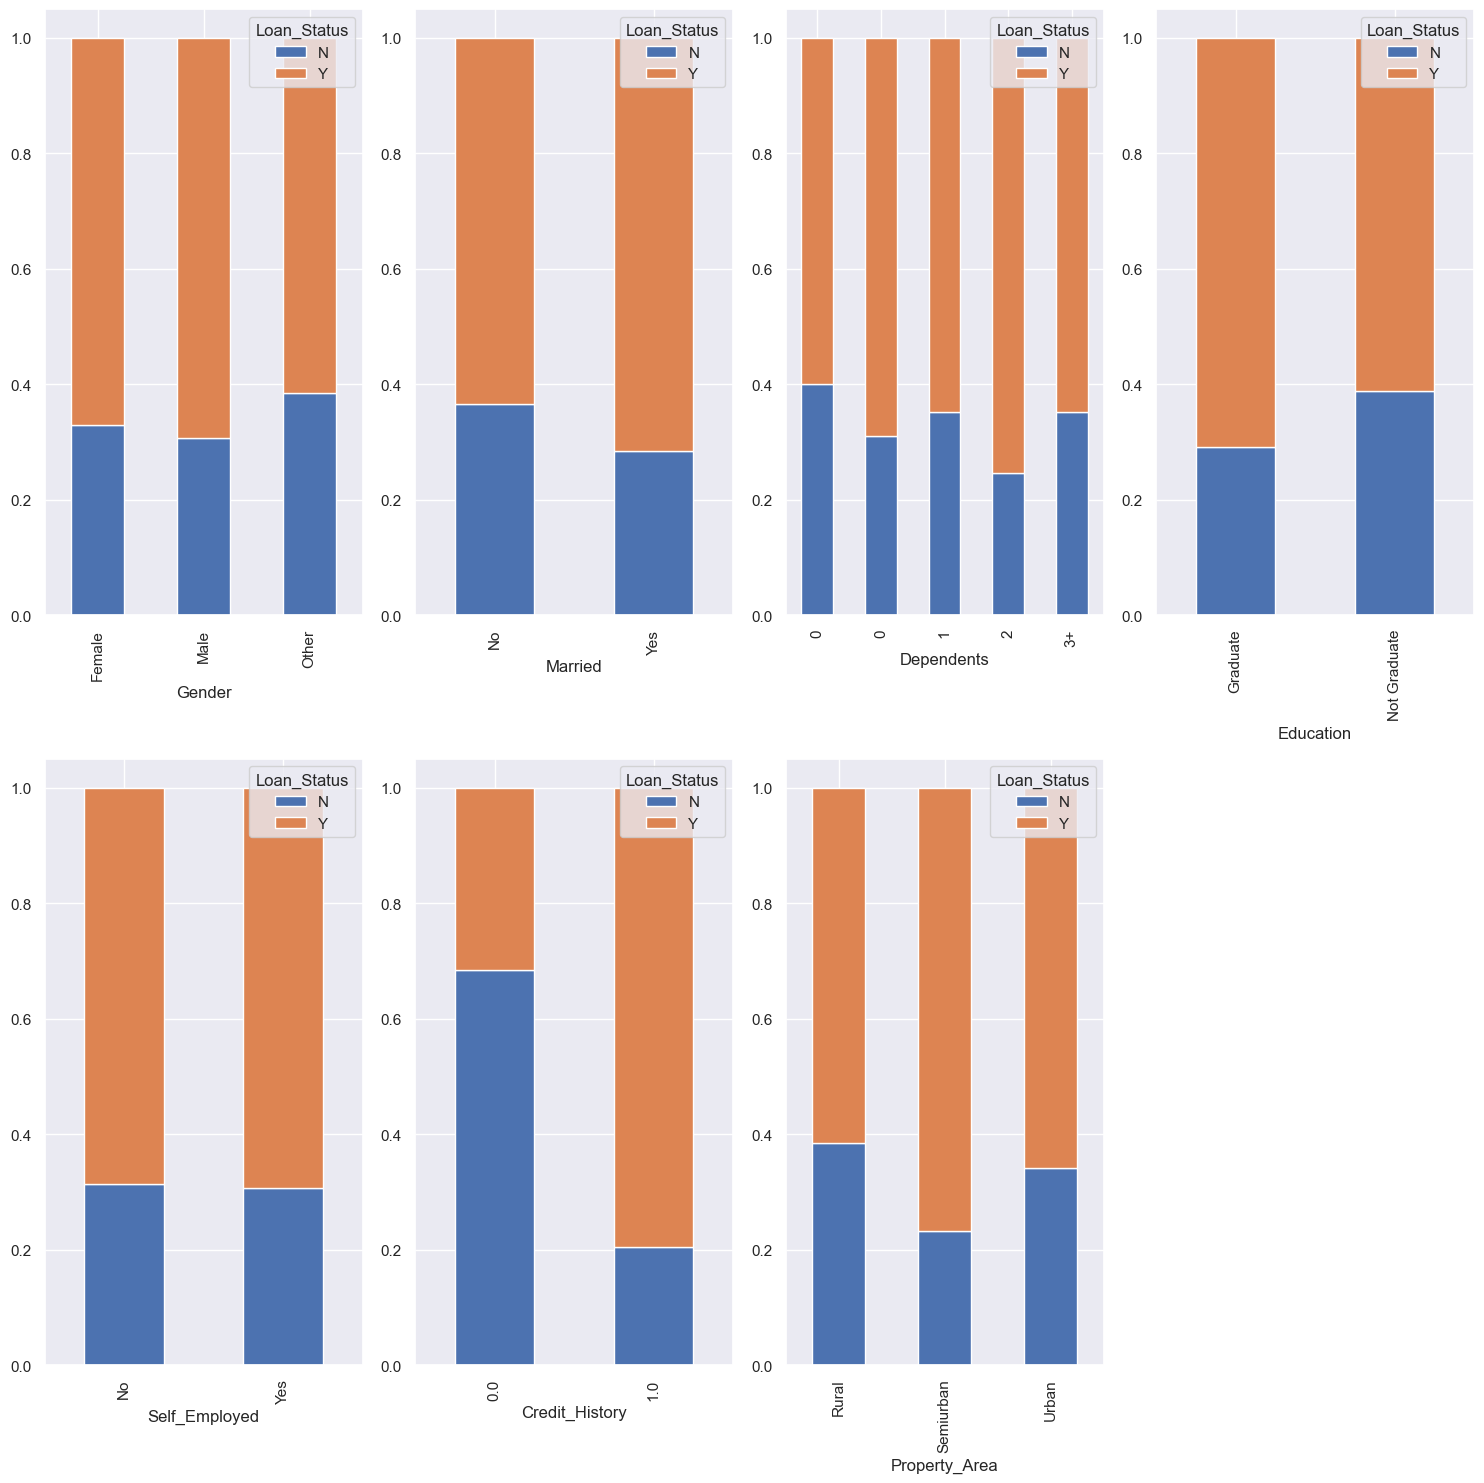

In [16]:
fig, ax = plt.subplots(2,4,figsize = (15,15))
Gender = pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[0,0])

Married = pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,1])

Dependents = pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,2])

Education = pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[0,3])

Self_Employed = pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,0])

Credit_History = pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,1])

Property_Area = pd.crosstab(df['Property_Area'],df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[1,2])

# Turn off the last unused subplot (ax[1, 3])
ax[1, 3].axis('off')

plt.tight_layout()
plt.show()

<Axes: xlabel='Loan_Status', ylabel='count'>

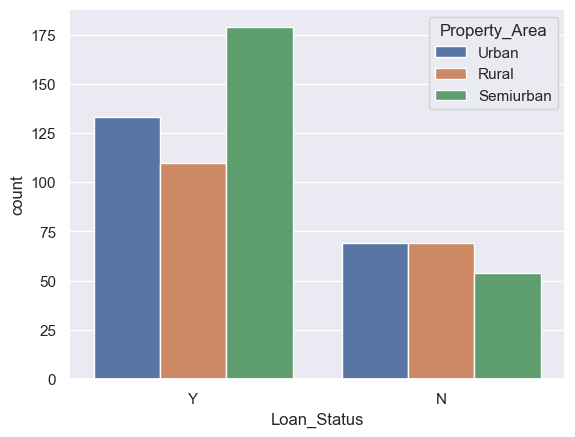

In [17]:
sns.countplot(data=df,x='Loan_Status',hue ='Property_Area')

<Axes: xlabel='Loan_Status', ylabel='count'>

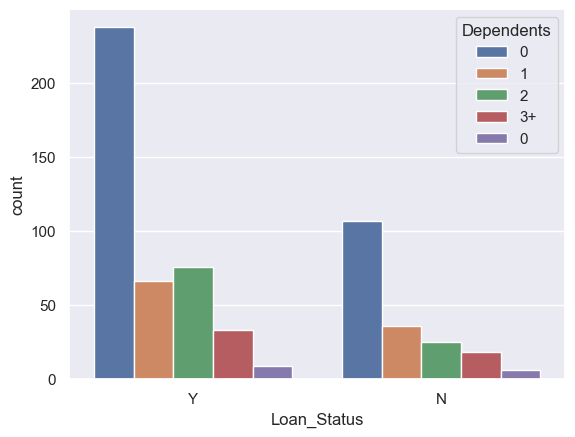

In [18]:
sns.countplot(data=df,x='Loan_Status',hue ='Dependents')

- Proportion of married applicants is higher for the approved loans.
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Text(0, 0.5, 'Percentage')

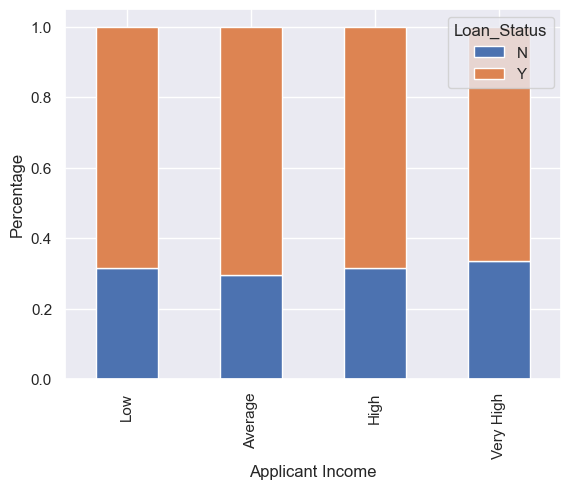

In [19]:
bins = []
bins = [0,2500,4000,6000,81000] 
groups = ['Low','Average','High','Very High']
df['Income_bin']=pd.cut(df['ApplicantIncome'], bins, labels = groups)
Income_bin = pd.crosstab(df['Income_bin'], df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True,)
plt.xlabel("Applicant Income")
plt.ylabel("Percentage")

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts the hypothesis in which I assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar manner.

Text(0, 0.5, 'Percentage')

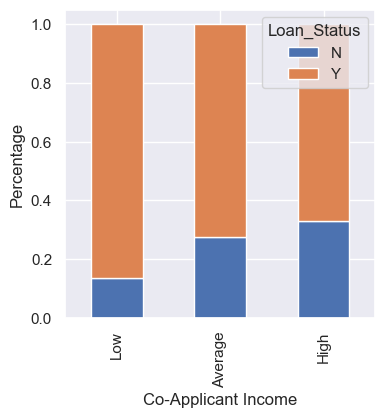

In [20]:
bins = [0,1000,3000,42000] 
groups = ['Low','Average','High']
df['Coapplicant_income_bin']=pd.cut(df['CoapplicantIncome'], bins, labels = groups) 
Coapplicant_Income = pd.crosstab(df['Coapplicant_income_bin'],df['Loan_Status'])
Coapplicant_Income.div(Coapplicant_Income.sum(1).astype(float), axis = 0).plot(kind ="bar", stacked = True, figsize = (4,4))
plt.xlabel("Co-Applicant Income")
plt.ylabel("Percentage")

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

Text(0, 0.5, 'Percentage')

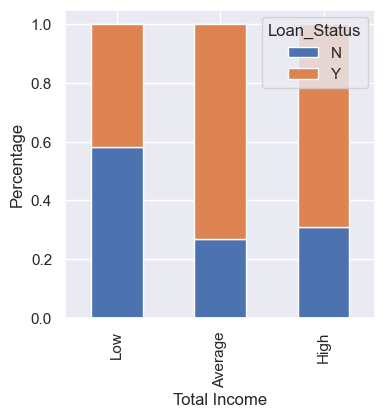

In [21]:
bins = [0,2500,4000,81000] 
groups = ['Low','Average','High']
df['Totalincome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Total_income_bin']=pd.cut(df['Totalincome'], bins, labels = groups) 
Total_Income = pd.crosstab(df['Total_income_bin'],df['Loan_Status'])
Total_Income.div(Total_Income.sum(1).astype(float), axis = 0).plot(kind ="bar", stacked = True, figsize = (4,4))
plt.xlabel("Total Income")
plt.ylabel("Percentage")

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

Let’s visualize the Loan amount variable.

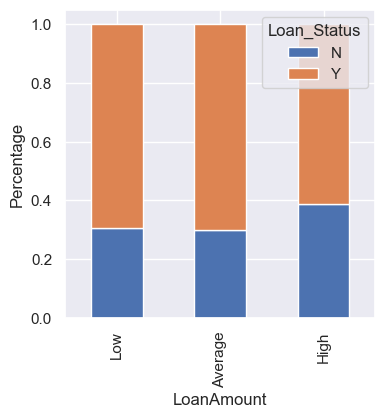

In [22]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
df['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(df['LoanAmount_bin'],df['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize = (4,4)) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [23]:
df=df.drop(['Income_bin', 'Coapplicant_income_bin', 'LoanAmount_bin', 'Total_income_bin', 'Totalincome', 'Loan_ID'], axis=1)
df['Dependents'].replace('3+', 3,inplace=True)

In [24]:
df['Dependents'] = df['Dependents'].astype('int')

In [25]:
label_encoder = preprocessing.LabelEncoder()
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

In [26]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

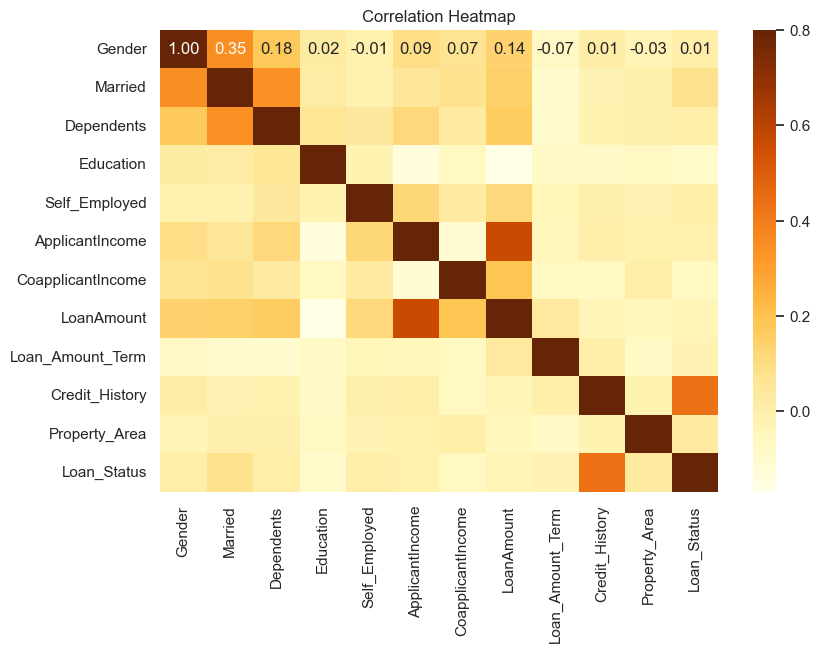

In [27]:
matrix = df.corr()
f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(matrix, vmax = .8, annot=True, cmap = "YlOrBr", fmt=".2f")
plt.title('Correlation Heatmap');

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

In [28]:
X=df.drop(["Loan_Status"],axis=1)
y=df["Loan_Status"]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [30]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
90,1,1,0,0,0,2958,2900.0,131.0,360.0,1.0,1
533,1,0,1,0,0,11250,0.0,196.0,360.0,0.0,1
452,1,1,0,0,0,3948,1733.0,149.0,360.0,0.0,0
355,0,0,0,0,0,3813,0.0,116.0,180.0,1.0,2
266,1,1,2,0,0,4708,1387.0,150.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
277,1,1,0,0,0,3103,1300.0,80.0,360.0,1.0,2
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1
359,1,1,3,0,0,5167,3167.0,200.0,360.0,1.0,1
192,1,1,0,1,0,6033,0.0,160.0,360.0,1.0,2


In [64]:
classification_models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "XGBClassifier": XGBClassifier(),
    "LogisticRegression":  LogisticRegression()
}

hyperparameter_grids = {
    "RandomForestClassifier": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'max_features': ['sqrt', 'log2'],
        'criterion': [None, 'entropy', 'gini']
    },

    "GradientBoostingClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01],
        'max_depth': [3, 5, 7]
    },

    "KNeighborsClassifier": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },

    "AdaBoostClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01],
        'algorithm': ['SAMME', 'SAMME.R']
    },

    "XGBClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01],
        'max_depth': [3, 5, 7]
    },

    "LogisticRegression": {
        'max_iter': [100, 1000]
    }
}

In [65]:
%%time
best_params_grids = {}
np.random.seed(10)
# searching through all possible variations of the hyperparameters for each model to find the best one
for model_name, params in hyperparameter_grids.items():
  gs_model = GridSearchCV(classification_models[model_name],
                          param_grid=params,
                          scoring='accuracy',
                          n_jobs=-1)
  gs_model.fit(x_train, y_train)
  best_params_grids[model_name] = gs_model.best_params_

CPU times: total: 2.06 s
Wall time: 6.74 s


In [66]:
best_params_grids

{'RandomForestClassifier': {'criterion': 'entropy',
  'max_depth': 10,
  'max_features': 'log2',
  'n_estimators': 200},
 'GradientBoostingClassifier': {'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 100},
 'KNeighborsClassifier': {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'},
 'AdaBoostClassifier': {'algorithm': 'SAMME',
  'learning_rate': 0.01,
  'n_estimators': 50},
 'XGBClassifier': {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200},
 'LogisticRegression': {'max_iter': 1000}}

In [67]:
tuned_classification_models = {
    "RandomForestClassifier": RandomForestClassifier(**best_params_grids['RandomForestClassifier']),
    "GradientBoostingClassifier": GradientBoostingClassifier(**best_params_grids['GradientBoostingClassifier']),
    "KNeighborsClassifier": KNeighborsClassifier(**best_params_grids['KNeighborsClassifier']),
    "AdaBoostClassifier": AdaBoostClassifier(**best_params_grids['AdaBoostClassifier']),
    "XGBClassifier": XGBClassifier(**best_params_grids['XGBClassifier']),
    "LogisticRegression": LogisticRegression(**best_params_grids['LogisticRegression'])
}

In [68]:
%%time

# where the results will be stored
classification_results = {}
cross_val_results = {}

np.random.seed(10)
# Loop through the items in the tuned_regression_models dictionary
for model_name, model in tuned_classification_models.items():

    # Fit the model to the training data
    print(f"Fitting {model_name}...")
    model.fit(x_train, y_train)

    kf = KFold(n_splits=10)

    # Score the model on the test data appending the model_name to the results dictionary using mean squared error (competition metric) and cross validation
    print(f"Scoring {model_name}...")
    cross_val_results[model_name] = -cross_val_score(model,
                                                     x_test,
                                                     y_test,
                                                     cv=kf)
    
    preds = model.predict(x_test)
    preds = pd.DataFrame(preds)
    classification_results[model_name] = preds

Fitting RandomForestClassifier...
Scoring RandomForestClassifier...
Fitting GradientBoostingClassifier...
Scoring GradientBoostingClassifier...
Fitting KNeighborsClassifier...
Scoring KNeighborsClassifier...
Fitting AdaBoostClassifier...
Scoring AdaBoostClassifier...
Fitting XGBClassifier...
Scoring XGBClassifier...
Fitting LogisticRegression...
Scoring LogisticRegression...
CPU times: total: 13 s
Wall time: 4.71 s


In [69]:
cross_val_results

{'RandomForestClassifier': array([-0.76923077, -0.76923077, -0.92307692, -0.75      , -0.66666667,
        -0.75      , -0.58333333, -0.75      , -0.83333333, -0.75      ]),
 'GradientBoostingClassifier': array([-0.76923077, -0.92307692, -0.92307692, -0.91666667, -0.83333333,
        -0.75      , -0.5       , -0.75      , -0.83333333, -0.83333333]),
 'KNeighborsClassifier': array([-0.69230769, -0.69230769, -0.69230769, -0.41666667, -0.75      ,
        -0.75      , -0.5       , -0.58333333, -0.75      , -0.58333333]),
 'AdaBoostClassifier': array([-0.84615385, -0.76923077, -1.        , -0.91666667, -0.66666667,
        -0.83333333, -0.5       , -0.83333333, -0.83333333, -0.66666667]),
 'XGBClassifier': array([-0.84615385, -0.84615385, -0.92307692, -0.83333333, -0.66666667,
        -0.75      , -0.5       , -0.75      , -0.83333333, -0.66666667]),
 'LogisticRegression': array([-0.69230769, -0.69230769, -0.84615385, -0.83333333, -0.66666667,
        -0.91666667, -0.5       , -0.83333333,

In [70]:
classification_results

{'RandomForestClassifier':      0
 0    1
 1    1
 2    1
 3    1
 4    1
 ..  ..
 118  1
 119  1
 120  1
 121  0
 122  1
 
 [123 rows x 1 columns],
 'GradientBoostingClassifier':      0
 0    1
 1    1
 2    1
 3    1
 4    1
 ..  ..
 118  1
 119  1
 120  1
 121  0
 122  1
 
 [123 rows x 1 columns],
 'KNeighborsClassifier':      0
 0    1
 1    1
 2    1
 3    1
 4    1
 ..  ..
 118  1
 119  0
 120  1
 121  1
 122  1
 
 [123 rows x 1 columns],
 'AdaBoostClassifier':      0
 0    1
 1    1
 2    1
 3    1
 4    1
 ..  ..
 118  1
 119  1
 120  1
 121  0
 122  1
 
 [123 rows x 1 columns],
 'XGBClassifier':      0
 0    1
 1    1
 2    1
 3    1
 4    1
 ..  ..
 118  1
 119  1
 120  1
 121  0
 122  1
 
 [123 rows x 1 columns],
 'LogisticRegression':      0
 0    1
 1    1
 2    1
 3    1
 4    1
 ..  ..
 118  1
 119  1
 120  1
 121  0
 122  1
 
 [123 rows x 1 columns]}

In [71]:
precision_results = {}
accuracy_results = {}
confusion_matrices = {}
classification_reports = {}
for model, dataframe in classification_results.items():
    precision_results[model] = precision_score(y_test, dataframe)
    accuracy_results[model] = accuracy_score(dataframe, y_test)
    confusion_matrices[model] = confusion_matrix(dataframe, y_test)
    classification_reports[model] = classification_report(dataframe, y_test)

In [72]:
precision_results

{'RandomForestClassifier': 0.8163265306122449,
 'GradientBoostingClassifier': 0.8282828282828283,
 'KNeighborsClassifier': 0.7254901960784313,
 'AdaBoostClassifier': 0.826530612244898,
 'XGBClassifier': 0.7961165048543689,
 'LogisticRegression': 0.8367346938775511}

In [73]:
accuracy_results

{'RandomForestClassifier': 0.7723577235772358,
 'GradientBoostingClassifier': 0.7967479674796748,
 'KNeighborsClassifier': 0.6422764227642277,
 'AdaBoostClassifier': 0.7886178861788617,
 'XGBClassifier': 0.7642276422764228,
 'LogisticRegression': 0.8048780487804879}

In [74]:
for model, dataframe in classification_results.items():
    print(model)
    print(confusion_matrices[model])
    print(classification_reports[model])

RandomForestClassifier
[[15 10]
 [18 80]]
              precision    recall  f1-score   support

           0       0.45      0.60      0.52        25
           1       0.89      0.82      0.85        98

    accuracy                           0.77       123
   macro avg       0.67      0.71      0.68       123
weighted avg       0.80      0.77      0.78       123

GradientBoostingClassifier
[[16  8]
 [17 82]]
              precision    recall  f1-score   support

           0       0.48      0.67      0.56        24
           1       0.91      0.83      0.87        99

    accuracy                           0.80       123
   macro avg       0.70      0.75      0.71       123
weighted avg       0.83      0.80      0.81       123

KNeighborsClassifier
[[ 5 16]
 [28 74]]
              precision    recall  f1-score   support

           0       0.15      0.24      0.19        21
           1       0.82      0.73      0.77       102

    accuracy                           0.64       123


In [75]:
cross_val_results = {key: abs(value) for key, value in cross_val_results.items()} # turning values positive
mean_results = {}
std_results = {}
for model, array in cross_val_results.items():
  mean_results[model] = np.mean(array)
  std_results[model] = np.std(array)
  print("mean of " + model + " is " + str(np.mean(array)))
  print("standard deviation of " + model + " is " + str(np.std(array)))
  print("--------------------------")

mean of RandomForestClassifier is 0.7544871794871795
standard deviation of RandomForestClassifier is 0.08494738674106131
--------------------------
mean of GradientBoostingClassifier is 0.8032051282051282
standard deviation of GradientBoostingClassifier is 0.11961785800064603
--------------------------
mean of KNeighborsClassifier is 0.641025641025641
standard deviation of KNeighborsClassifier is 0.10972591518348518
--------------------------
mean of AdaBoostClassifier is 0.7865384615384615
standard deviation of AdaBoostClassifier is 0.13555987345059314
--------------------------
mean of XGBClassifier is 0.7615384615384615
standard deviation of XGBClassifier is 0.11721482943431792
--------------------------
mean of LogisticRegression is 0.7480769230769231
standard deviation of LogisticRegression is 0.11868672403238058
--------------------------


In [76]:
best_mean_model_name = max(mean_results, key=mean_results.get)
best_std_model_name = min(std_results, key=std_results.get)

if best_mean_model_name == best_std_model_name:
    print("Model has both the highest mean and lowest standard deviation.")
else:
    print("Model does not have both the highest mean and lowest standard deviation.")

best_model = tuned_classification_models[best_mean_model_name]
best_model

Model does not have both the highest mean and lowest standard deviation.


GradientBoostingClassifier(learning_rate=0.01)

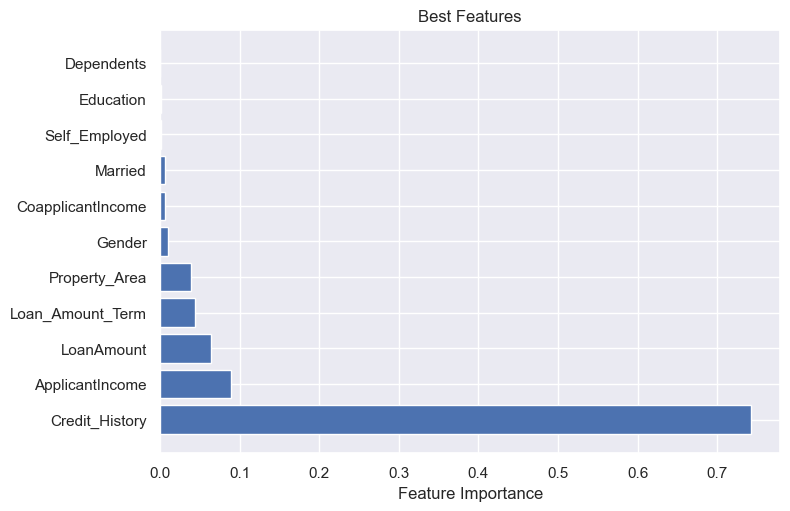

In [77]:
feature_importances = best_model.feature_importances_
feature_names = X.columns

fig, ax = plt.subplots(figsize=(8, len(feature_names) * 0.5))

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_numbers = feature_importances[sorted_indices]

ax.barh(range(len(sorted_feature_names)), sorted_numbers)
ax.set_yticks(range(len(sorted_feature_names)))
ax.set_yticklabels(sorted_feature_names)
ax.set_xlabel('Feature Importance')
ax.set_title('Best Features')

plt.show()